In [4]:
import csv
import pandas as pd
from rdflib import Graph, Literal, URIRef
from rdflib.namespace import RDFS,FOAF,OWL
from langdetect import detect
from DataMovies import MovieList
import nltk
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import community
import collections
from operator import itemgetter
from networkx.algorithms import community

In [4]:

class Movie:
    def __init__(self, id, title, uri, genre):
        self.id = id
        self.title = title
        self.uri = uri
        self.genre = genre

def MovieList():
    list = []
    with open('FinalBaza1.csv') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        count = 0
        for row in csv_reader:
            if count != 0:
                m = Movie(row[0], row[1], row[2], row[3])
                list.append(m)
            count += 1
            #print(row[0])
    return list


In [3]:
MovieList = MovieList()
def similar(title):
    final_list =[]
    
    #Find the selected movie from the movie list
    for movie in MovieList:
        if movie.title == title:
            myTitle = movie.title
            myUri = movie.uri
            myGenres = movie.genre.split()
            
    #Compare with the rest of the movies by genre
    sameGenres = []
    for movie in MovieList:
        if myTitle != movie.title:
            gen = []
            gen = movie.genre.split()
            if set(myGenres) == set(gen):
                sameGenres.append(movie.uri)
    #If there are other movies with the same genre
    if len(sameGenres) != 0:
        myAbstract = ""
        myDirector = ""
        final_list = []
        uri =""
        obj = ""
        obje = ""
        #najdi gi directors i abstract
        g = globals()
        i = 0
        director = URIRef("http://dbpedia.org/ontology/director")
        directors_dict = {}
        abstract = URIRef("http://dbpedia.org/ontology/abstract")
        abstract_dict = {}
        for sg in sameGenres:
            graph = Graph()
            graph.parse(location=sg)
            for s, p, o in graph.triples((None, director, None)):
                obj = o.encode('utf-8')
            directors_dict[sg] = obj
            for s, p, o in graph.triples((None, abstract, None)):
                if detect(o) == 'en':
                    obje = o.encode('utf-8')
            abstract_dict[sg] = obje
            g['graph_{0}'.format(i)] = graph
            i += 1
            
        #najdi go mojot abstract i director
        myGraph = Graph()
        myGraph.parse(location=myUri)
        for s, p, o in myGraph.triples((None, director, None)):
            obj = o.encode('utf-8')
        myDirector = obj
        for s, p, o in myGraph.triples((None, abstract, None)):
            if detect(o) == 'en':
                obje = o.encode('utf-8')
                myAbstract = obje

        #lista dali ima filmovi so ist director kako mojot
        sameDirector = []
        for key in directors_dict.keys():
            if myDirector == directors_dict[key]:
                sameDirector.append(key)

        uri = ""
        final_list = []
        if len(sameDirector) != 0:
            #ako ima filmovi so ist director kako mojot
            for sd in sameDirector:
                for key in abstract_dict.keys():
                    if sd == key:
                        similarity = nltk.jaccard_distance(set(myAbstract.split()), set(abstract_dict[key].split()))
                        if similarity > 0.5:
                            uri = key
                            for movie in MovieList:
                                if uri == movie.uri:
                                    final_list.append(movie.title)

        #ako nema ist director a ima ist genre
        else:
            uri = ""
            final_list = []
            for key in abstract_dict.keys():
                    similarity = nltk.jaccard_distance(set(myAbstract.split()), set(abstract_dict[key].split()))
                    if similarity > 0.7:
                        uri = key
                        for movie in MovieList:
                            if uri == movie.uri:
                                final_list.append(movie.title)

    #ako nema drug film so ist genre kako selektiraniot(mojot)
    else:
        g = globals()
        myAbstract = ""
        myDirector = ""
        final_list = []
        uri = ""
        obj = ""
        obje = ""
        i = 0
        director = URIRef("http://dbpedia.org/ontology/director")
        directors_dict = {}
        abstract = URIRef("http://dbpedia.org/ontology/abstract")
        abstract_dict = {}
        for ml in MovieList:
            if myTitle != ml.title:
                graph = Graph()
                graph.parse(location=ml.uri)
                for s, p, o in graph.triples((None, director, None)):
                    obj = o.encode('utf-8')
                directors_dict[ml.uri] = obj
                for s, p, o in graph.triples((None, abstract, None)):
                    if detect(o) == 'en':
                        obje = o.encode('utf-8')
                abstract_dict[ml.uri] = obje
                g['graph_{0}'.format(i)] = graph
                i += 1

        # najdi go mojot abstract i director
        myGraph = Graph()
        myGraph.parse(location=myUri)
        for s, p, o in myGraph.triples((None, director, None)):
            obj = o.encode('utf-8')
        myDirector = obj
        for s, p, o in myGraph.triples((None, abstract, None)):
            if detect(o) == 'en':
                obje = o.encode('utf-8')
                myAbstract = obje
    
        # lista dali ima filmovi so ist director kako mojot
        sameDirector = []
        for key in directors_dict.keys():
            if myDirector == directors_dict[key]:
                sameDirector.append(key)

        uri = ""
        final_list = []
        if len(sameDirector) != 0:
            # ako ima filmovi so ist director kako mojot
            for sd in sameDirector:
                for key in abstract_dict.keys():
                    if sd == key:
                        similarity = nltk.jaccard_distance(set(myAbstract.split()), set(abstract_dict[key].split()))
                        if similarity >0.7:
                            uri = key
                            for movie in MovieList:
                                if uri == movie.uri:
                                    final_list.append(movie.title)                            
        # ako nema ist director
        else:
            final_list = []
            uri = ""
            for key in abstract_dict.keys():
                similarity = nltk.jaccard_distance(set(myAbstract.split()), set(abstract_dict[key].split()))
                if similarity > 0.99:
                    uri = key
                    for movie in MovieList:
                        if uri == movie.uri:
                            final_list.append(movie.title)

    return (final_list)


In [55]:
for movie in MovieList:  
    similarM = similar(movie.title)
    print(movie.title + "----->")
    print(*similarM, sep=';')
    print(" ")
    

Windtalkers----->
The Last Samurai;The Patriot
 
The Huntsman: Winter's War----->
King Kong;Exodus: Gods and Kings;Life of Pi;Gladiator
 
Teenage Mutant Ninja Turtles----->
Teenage Mutant Ninja Turtles: Out of the Shadows
 
Gravity----->
Mission: Impossible (film)
 
Dante's Peak----->
Quantum of Solace;Skyfall;Mission: Impossible - Rogue Nation;Mission: Impossible III;Die Another Day;The World Is Not Enough;Mission: Impossible II;Tomorrow Never Dies;Speed 2: Cruise Control;Casino Royale;The Expendables 2;Mission: Impossible - Ghost Protocol;Mission: Impossible (film)
 
Teenage Mutant Ninja Turtles: Out of the Shadows----->
Teenage Mutant Ninja Turtles
 
Fantastic Four----->
Fantastic 4: Rise of the Silver Surfer
 
Night at the Museum----->
Night at the Museum: Battle of the Smithsonian
 
San Andreas----->
White House Down;Blood Diamond
 
Tomorrow Never Dies----->
Quantum of Solace;Skyfall;Mission: Impossible - Rogue Nation;Mission: Impossible III;Die Another Day;The World Is Not Enough

In [5]:
movieList = []
recommendationDict = {}
with open('NovaBaza.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        movieList.append(row['title'])
        recommendationDict[row['title']] = row['recommendation']

In [6]:
matrix = np.empty((len(movieList), len(movieList)), dtype=int)

for i in range(len(movieList)):
    for j in range(len(movieList)):
        flag = 0
        for key in recommendationDict.keys():
            movies = recommendationDict[key].split("#")
            for m in movies:
                if key == movieList[i] and m == movieList[j]:
                    flag = 1
        matrix[i][j] = flag
            

df = pd.DataFrame(matrix, index=movieList, columns=movieList)

In [7]:
df.to_csv("matrix.csv", encoding='utf-8')

In [8]:
df

,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,John Carter,Spider-Man 3,Tangled,Avengers: Age of Ultron,Harry Potter and the Half-Blood Prince,Batman v Superman: Dawn of Justice,...,Eragon,Where the Wild Things Are,Epic,The Tourist,End of Days,Blood Diamond,The Wolf of Wall Street,Batman Forever,Mission: Impossible - Ghost Protocol,Mission: Impossible (film)
Avatar,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Pirates of the Caribbean: At World's End,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Spectre,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
The Dark Knight Rises,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
John Carter,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Spider-Man 3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tangled,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Avengers: Age of Ultron,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Harry Potter and the Half-Blood Prince,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Batman v Superman: Dawn of Justice,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
G=nx.from_numpy_matrix(matrix) # G ni e obicniot graf
labels = {}
i = 0
for movie in movieList:
    labels[i] = movie
    i += 1
#print (labels)

H = nx.relabel_nodes(G, labels) # H ni e labelnat graf, ist kako G

In [10]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 295
Number of edges: 1103
Average degree:   7.4780


C:\Users\ALEKSANDRA\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


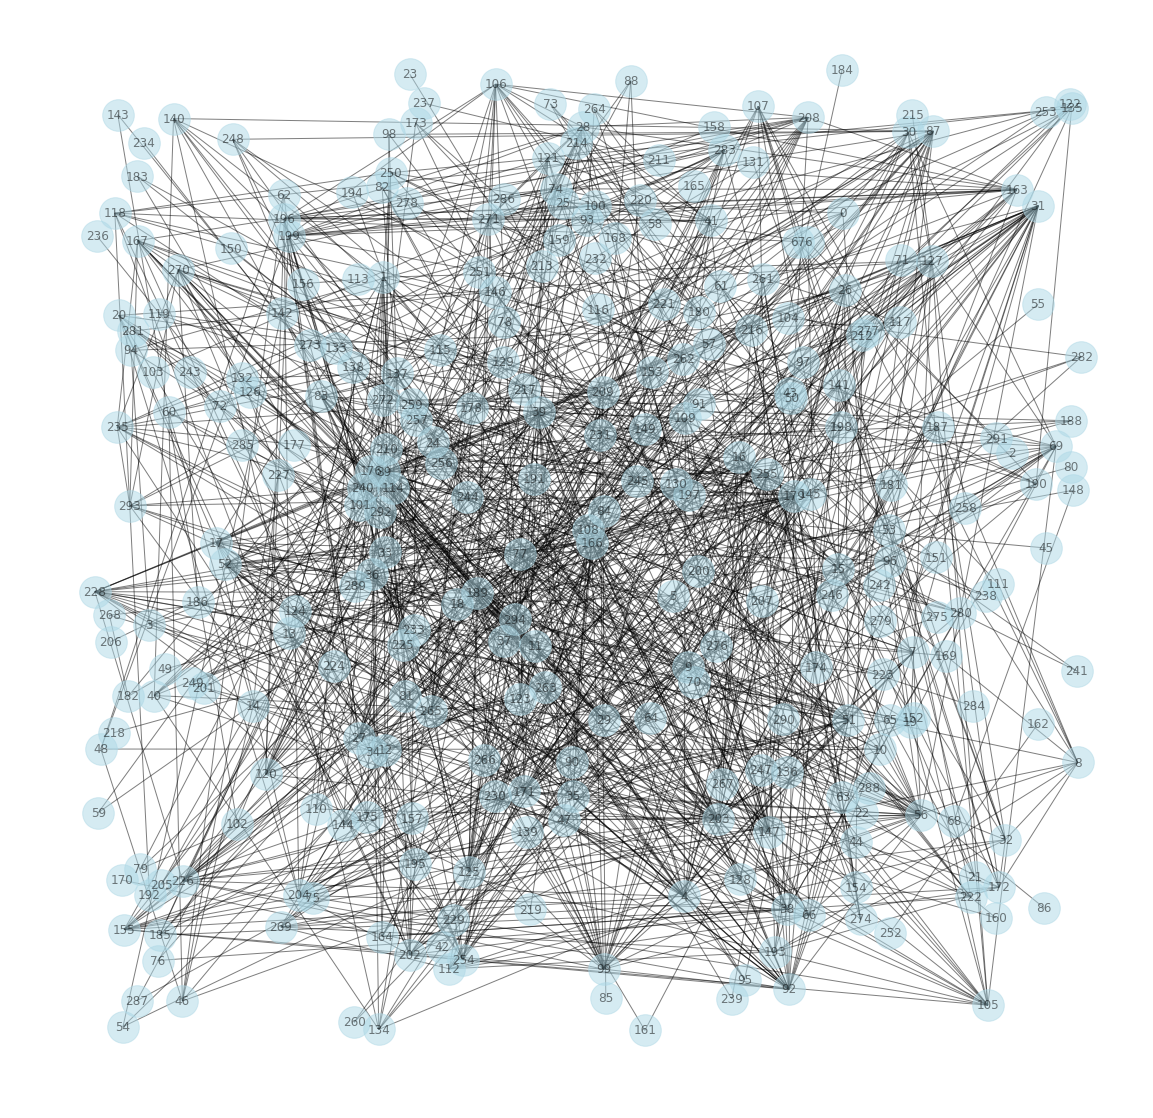

In [11]:
fig, ax = plt.subplots(figsize=(20,20))
nx.draw_random(G,node_color='lightblue',with_labels = True, node_size=1000, alpha=0.5, ax=ax)
plt.savefig("graph_GG.png") 
plt.show()

## The Shape of the Network

In [17]:
density = nx.density(G)
print("Network density:", density)

Network density: 0.025435258849302433


In [18]:
print(nx.is_connected(G))

False


In [12]:
#nema da presmetuvame na site zatoa sto ne ni e connected grafot
path = nx.shortest_path(H, source="The Amazing Spider-Man 2", target="The Hunger Games: Mockingjay - Part 2")
print("Shortest path between The Amazing Spider-Man 2 and The Hunger Games: Mockingjay - Part 2:", path)

#ako ne moze da se najde shortest path pomegju 2 filma, toa znaci deka tie ne se vo ista komponenta,
#ne se povrzani, odnosno nemaat nisto zaednicko (director, genre)

Shortest path between The Amazing Spider-Man 2 and The Hunger Games: Mockingjay - Part 2: ['The Amazing Spider-Man 2', 'Batman v Superman: Dawn of Justice', "Pirates of the Caribbean: At World's End", 'The Lone Ranger', 'The Hunger Games: Mockingjay - Part 1', 'The Hunger Games: Mockingjay - Part 2']


In [20]:
print("Graph is connected =", nx.is_connected(H))
print("Number of connected components =", nx.number_connected_components(H))
print("Connected components: ")
a = 0
for i in list(nx.connected_components(H)):
    print("\n")
    print("Component ", a)
    print("\n")
    for j in i:
        print(j)
    a+=1

Graph is connected = False
Number of connected components = 33
Connected components: 


Component  0


Ghostbusters
War of the Worlds
Transformers: Age of Extinction
The Lone Ranger
Star Trek Into Darkness
X-Men: Apocalypse
Penguins of Madagascar
Ratatouille
Hugo
Flushed Away
San Andreas
Noah
The Perfect Storm
Charlie and the Chocolate Factory
Terminator 2: Judgment Day
Planet of the Apes
Star Trek
Battleship
Die Another Day
The Avengers
Ocean's Twelve
Little Fockers
Night at the Museum: Secret of the Tomb
Bad Boys II
Ant-Man
The Mummy: Tomb of the Dragon Emperor
Dante's Peak
Live Free or Die Hard
The Hobbit: An Unexpected Journey
Jurassic World
The Bourne Legacy
X-Men Origins: Wolverine
Warcraft
The Expendables 2
X-Men: Days of Future Past
Pearl Harbor
The Hobbit: The Battle of the Five Armies
Ghost Rider
Sahara
The Wolf of Wall Street
TRON: Legacy
Waterworld
Guardians of the Galaxy
Captain America: The Winter Soldier
Tomorrow Never Dies
Australia
Kung Fu Panda
Mars Needs Moms
End of 

In [14]:
# Next, use nx.connected_components to get the list of components,
# then use the max() command to find the largest one:
components = nx.connected_components(H)
largest_component = max(components, key=len)
print(largest_component)
# Create a "subgraph" of just the largest component
# Then calculate the diameter of the subgraph, just like you did with density.

subgraph = H.subgraph(largest_component)
print(nx.info(subgraph))
diameter = nx.diameter(subgraph)
center = nx.center(subgraph)
radius = nx.radius(subgraph)
print("Network diameter of largest component:", diameter)
print("Network center of largest component:", center)
print("Network radius of largest component:", radius)

{'True Lies', 'Batman v Superman: Dawn of Justice', 'The Matrix Reloaded', 'Sherlock Holmes: A Game of Shadows', 'The Taking of Pelham 1 2 3', '47 Ronin', 'Harry Potter and the Prisoner of Azkaban', 'Robin Hood', "Pirates of the Caribbean: Dead Man's Chest", 'Sahara', 'Asterix at the Olympic Games', 'Inside Out', 'G.I. Joe: Retaliation', 'Penguins of Madagascar', 'Poseidon', 'Alexander', 'Australia', 'G.I. Joe: The Rise of Cobrav', 'Cars 2', 'Alice in Wonderland', 'Ghost Rider', 'Terminator 3: Rise of the Machines', 'Troy', 'Blood Diamond', 'The Mummy: Tomb of the Dragon Emperor', 'Planet of the Apes', 'John Carter', 'San Andreas', 'Waterworld', 'Wreck-It Ralph', 'Stuart Little', 'Mars Needs Moms', 'Final Fantasy: The Spirits Within', 'The Revenant', 'Pirates of the Caribbean: On Stranger Tides', 'The Princess and the Frog', 'Django Unchained', 'X-Men Origins: Wolverine', 'Star Trek Into Darkness', 'After Earth', 'Tomorrow Never Dies', 'The Expendables 2', 'Iron Man 3', 'R.I.P.D.', 'Th

In [22]:
triadic_closure = nx.transitivity(G)
print("Triadic closure:", triadic_closure)

Triadic closure: 0.7393830128205128


In [23]:
#Finding all the cliques in the graph
i = 1
for clique in nx.find_cliques(H):
    print("Clique", i)
    for types in clique:
        print(types)
    i+=1
    print("\n")

Clique 1
Ghostbusters
Penguins of Madagascar


Clique 2
Ghostbusters
Mr. Peabody & Sherman


Clique 3
Ghostbusters
How Do You Know


Clique 4
Ghostbusters
The Aviator


Clique 5
Ghostbusters
Stuart Little


Clique 6
War of the Worlds
Allegiant
Insurgent


Clique 7
War of the Worlds
Minority Report


Clique 8
Spider-Man
Hancock


Clique 9
Ratatouille
Tomorrowland


Clique 10
Ratatouille
Stuart Little
The Smurfs 2


Clique 11
Penguins of Madagascar
Django Unchained


Clique 12
Penguins of Madagascar
Little Fockers


Clique 13
Penguins of Madagascar
The Revenant


Clique 14
Penguins of Madagascar
Wreck-It Ralph
Bolt
Kung Fu Panda
Stuart Little 2
Up
Bee Movie
Flushed Away
Cars 2
Rio 2


Clique 15
Penguins of Madagascar
Wreck-It Ralph
300: Rise of an Empire


Clique 16
Penguins of Madagascar
Wreck-It Ralph
Salt


Clique 17
Penguins of Madagascar
Wreck-It Ralph
Suicide Squad


Clique 18
Penguins of Madagascar
Wreck-It Ralph
Shin Godzilla


Clique 19
Penguins of Madagascar
Wreck-It Ralph
Saha

## Centrality

In [24]:
degree_dict = dict(H.degree(H.nodes()))
nx.set_node_attributes(H, degree_dict, 'degree')

sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by degree:")
for d in sorted_degree[:20]:
    print(d)

Top 20 nodes by degree:
('Total Recall', 36)
('TRON: Legacy', 29)
('Captain America: The First Avenger', 29)
('John Carter', 28)
('Iron Man 3', 28)
('Pacific Rim', 28)
('Star Trek Beyond', 28)
('Independence Day: Resurgence', 28)
('Guardians of the Galaxy', 28)
('X-Men: First Class', 28)
('The Incredible Hulk', 28)
('Ant-Man', 28)
('After Earth', 28)
('Mission: Impossible III', 23)
('Wreck-It Ralph', 22)
('Penguins of Madagascar', 21)
('X2', 19)
('Batman v Superman: Dawn of Justice', 18)
('The Chronicles of Narnia: Prince Caspian', 18)
('Armageddon', 18)


In [25]:
betweenness_dict = nx.betweenness_centrality(H) # Run betweenness centrality
nx.set_node_attributes(H, betweenness_dict, 'betweenness')
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by betweenness centrality:")
for b in sorted_betweenness[:20]:
    print(b)

Top 20 nodes by betweenness centrality:
('Total Recall', 0.13963734659521365)
('The Chronicles of Narnia: Prince Caspian', 0.08847642052976434)
('The Amazing Spider-Man 2', 0.08349191830746062)
('Mission: Impossible III', 0.05145337470313712)
('Pearl Harbor', 0.05143315593035732)
('Armageddon', 0.040624273279233125)
('Dark Shadows', 0.03697539220634749)
('Home', 0.03505775564232569)
('Avatar', 0.03454760743887999)
('Alice in Wonderland', 0.03400355500730406)
('Penguins of Madagascar', 0.03354614313729709)
('Wreck-It Ralph', 0.032617183266481685)
('300: Rise of an Empire', 0.031892530804810776)
('Batman v Superman: Dawn of Justice', 0.03155209660876708)
('Titanic', 0.030670288593253)
('Star Wars: Episode I - The Phantom Menace', 0.030314646054699593)
('The BFG', 0.02992732929349214)
('Sherlock Holmes: A Game of Shadows', 0.029778520075397847)
('The Perfect Storm', 0.02925757119341011)
('Planet of the Apes', 0.028146185637469845)


In [26]:
#First get the top 20 nodes by betweenness as a list
top_betweenness = sorted_betweenness[:20]

#Then find and print their degree
for tb in top_betweenness: # Loop through top_betweenness
    degree = degree_dict[tb[0]] # Use degree_dict to access a node's degree
    print("Name:", tb[0], "| Betweenness Centrality:", tb[1], "| Degree:", degree)

Name: Total Recall | Betweenness Centrality: 0.13963734659521365 | Degree: 36
Name: The Chronicles of Narnia: Prince Caspian | Betweenness Centrality: 0.08847642052976434 | Degree: 18
Name: The Amazing Spider-Man 2 | Betweenness Centrality: 0.08349191830746062 | Degree: 17
Name: Mission: Impossible III | Betweenness Centrality: 0.05145337470313712 | Degree: 23
Name: Pearl Harbor | Betweenness Centrality: 0.05143315593035732 | Degree: 6
Name: Armageddon | Betweenness Centrality: 0.040624273279233125 | Degree: 18
Name: Dark Shadows | Betweenness Centrality: 0.03697539220634749 | Degree: 3
Name: Home | Betweenness Centrality: 0.03505775564232569 | Degree: 6
Name: Avatar | Betweenness Centrality: 0.03454760743887999 | Degree: 6
Name: Alice in Wonderland | Betweenness Centrality: 0.03400355500730406 | Degree: 11
Name: Penguins of Madagascar | Betweenness Centrality: 0.03354614313729709 | Degree: 21
Name: Wreck-It Ralph | Betweenness Centrality: 0.032617183266481685 | Degree: 22
Name: 300: R

## Advanced NetworkX: Community detection with modularity

In [27]:
communities = community.greedy_modularity_communities(H)

modularity_dict = {} # Create a blank dictionary
for i,c in enumerate(communities): # Loop through the list of communities, keeping track of the number for the community
    for name in c: # Loop through each person in a community
        modularity_dict[name] = i # Create an entry in the dictionary for the person, where the value is which group they belong to.

# Now you can add modularity information like we did the other metrics
nx.set_node_attributes(H, modularity_dict, 'modularity')

sorted_modularity = sorted(modularity_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by modularity:")
for m in sorted_modularity[:20]:
    print(m)

Top 20 nodes by modularity:
('Batman & Robin', 40)
('Batman Forever', 40)
('The Last Airbender', 39)
('Eragon', 39)
('National Treasure', 38)
("The Sorcerer's Apprentice", 38)
('The Bourne Ultimatum', 37)
('Eraser', 37)
('The Other Guys', 36)
('The Green Hornet', 36)
("Charlie's Angels: Full Throttle", 35)
('Around the World in 80 Days', 35)
('Real Steel', 34)
('Hulk', 34)
('Fun with Dick and Jane', 33)
("Gulliver's Travels", 33)
('Fantastic Four', 32)
('Fantastic 4: Rise of the Silver Surfer', 32)
('Teenage Mutant Ninja Turtles: Out of the Shadows', 31)
('Teenage Mutant Ninja Turtles', 31)


In [28]:
# best_partition maximizes modularity using Louvain heuristics
import community
def draw_best_partition_graph(G, with_labels=True):

    partition = community.best_partition(G)
    sorted_by_value = sorted(partition.items(), key=lambda kv: kv[1])
    for (k, v) in sorted_by_value:
        kk = labels[k]
        print("Community =", v, ", Type =", k, kk)
    values = [partition.get(node) for node in G.nodes()]
    mod = community.modularity(partition,G)

    print("Modularity:", mod)
    print("Number of communities with best partition method = ", len(set(partition.values())))

    plt.figure(figsize=(20,14))
    nx.draw_spring(G, k=1, cmap = plt.get_cmap('jet'), node_color = values, node_size=1000, with_labels=with_labels, font_size=10)

Community = 0 , Type = 0 Avatar
Community = 0 , Type = 10 Superman Returns
Community = 0 , Type = 14 Man of Steel
Community = 0 , Type = 25 Titanic
Community = 0 , Type = 43 Terminator Salvation
Community = 0 , Type = 46 X-Men: Days of Future Past
Community = 0 , Type = 48 Jack the Giant Slayer
Community = 0 , Type = 60 Jupiter Ascending
Community = 0 , Type = 62 X-Men: Apocalypse
Community = 0 , Type = 91 Terminator 3: Rise of the Machines
Community = 0 , Type = 160 Watchmen
Community = 0 , Type = 205 The Bourne Legacy
Community = 0 , Type = 214 Jason Bourne
Community = 0 , Type = 221 Speed Racer
Community = 0 , Type = 223 Knight and Day
Community = 0 , Type = 227 The Wolverine
Community = 0 , Type = 256 Live Free or Die Hard
Community = 0 , Type = 272 Terminator 2: Judgment Day
Community = 0 , Type = 275 True Lies
Community = 1 , Type = 1 Pirates of the Caribbean: At World's End
Community = 1 , Type = 5 Spider-Man 3
Community = 1 , Type = 9 Batman v Superman: Dawn of Justice
Communit

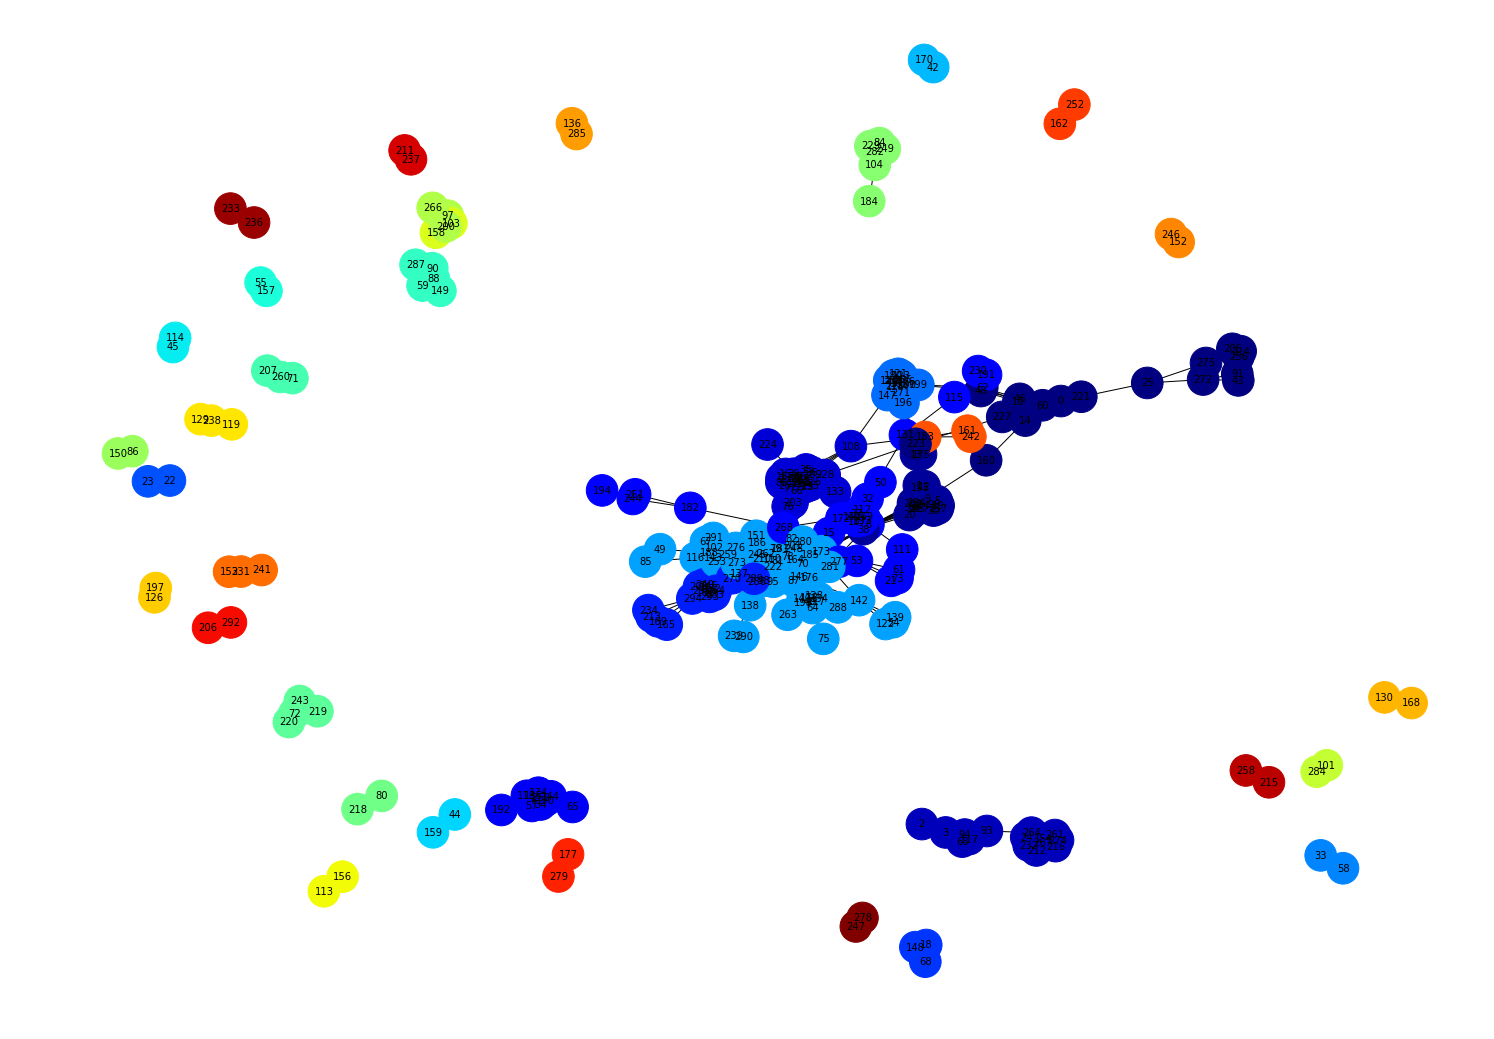

In [29]:
draw_best_partition_graph(G, with_labels=1)

### Exporting Data

In [30]:
nx.write_gexf(G, "graphGG.gexf")
nx.write_gexf(H, "graphHH.gexf")